# BABIP (Batting Average on Balls in Play)

홈런이 아닌 타구가 얼마나 'in play'되는가를 나타내는 비율   
'in play' 타구는 타자의 재능뿐만 아니라 운과 상대 수비 능력에 따라 달라진다.   
운과 상대의 수비 능력은 타자가 제어할 수 있는 것이 아니기 때문에,   
BABIP을 통해 타자의 재능을 살펴보려면 많은 sample size가 필요하다.(일반적으로 800 balls in play)   
   
리그의 평균 BABIP은 .300 정도 된다. (메이저리그 기준)
   
    
**BABIP = ( H - HR ) / ( AB - K - HR + SF )**   
H : Hit 안타   
HR : Homerun 홈런   
AB : At bat 타수   
K : 삼진   
SF : Sacrifice bunt 희생번트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('Batting.csv')

# 각 년도별 타자 평균 BABIP

In [4]:
year = df.groupby('yearID').sum().reset_index()
year['BABIP'] = (year['H']-year['HR'])/(year['AB']-year['SO']-year['HR']+year['SF'])
year

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
0,1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,0.288113
1,1872,172,3306,15665,3390,4467,581,145,37,2132.0,269.0,134.0,263,265.0,0.0,0.0,0.0,0.0,97.0,0.288355
2,1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,0.293315
3,1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,0.277116
4,1875,247,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,0.259285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2016,1620,70451,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,1025.0,1214.0,3719.0,0.300091
146,2017,1638,70743,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,15829,40104.0,970.0,1763.0,925.0,1168.0,3804.0,0.299603
147,2018,1705,71590,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,41207.0,929.0,1922.0,823.0,1235.0,3457.0,0.295583
148,2019,1742,71684,166651,23467,42039,8531,785,6776,22471.0,2280.0,832.0,15895,42823.0,753.0,1984.0,776.0,1150.0,3463.0,0.298328


C:\Users\pcw78\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


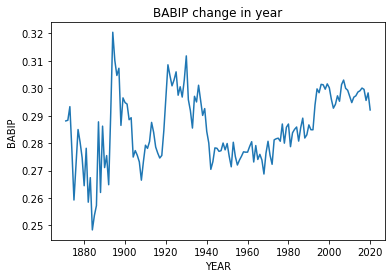

In [5]:
sns.lineplot(year['yearID'], year['BABIP'])
plt.title('BABIP change in year')
plt.xlabel('YEAR')
plt.show()

### 희생번트(SF)가 0인 년도 제외

C:\Users\pcw78\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


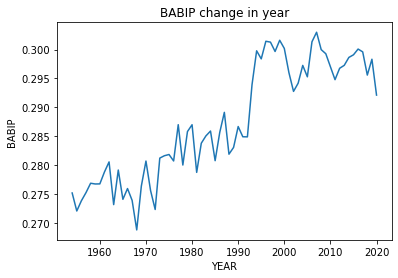

In [6]:
year2 = year[year['SF']>0]
sns.lineplot(year2['yearID'], year2['BABIP'])
plt.title('BABIP change in year')
plt.xlabel('YEAR')
plt.show()

#### 90년대 중반을 기점으로 BABIP 수치가 0.3에 근사해졌다

### 2000년 이후 BABIP

<ipython-input-7-fc0ba63059db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year3['yearID'] = pd.to_datetime(year3['yearID'], format='%Y')
C:\Users\pcw78\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


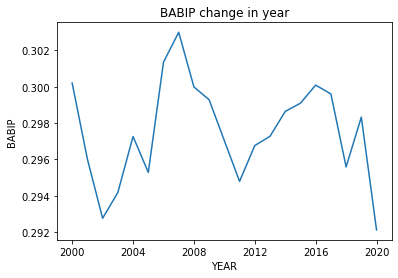

In [7]:
year3 = year[year['yearID']>=2000]
year3['yearID'] = pd.to_datetime(year3['yearID'], format='%Y')
sns.lineplot(year3['yearID'], year3['BABIP'])
plt.title('BABIP change in year')
plt.xlabel('YEAR')
plt.show()

# 2018년 타자들의 BABIP

In [8]:
bat_18 = df[df['yearID']==2018]
bat_18['BABIP'] = (bat_18['H']-bat_18['HR'])/(bat_18['AB']-bat_18['SO']-bat_18['HR']+bat_18['SF'])
bat_18.dropna(inplace=True)

<ipython-input-8-5a4047dd3552>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_18['BABIP'] = (bat_18['H']-bat_18['HR'])/(bat_18['AB']-bat_18['SO']-bat_18['HR']+bat_18['SF'])
<ipython-input-8-5a4047dd3552>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_18.dropna(inplace=True)


C:\Users\pcw78\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BABIP', ylabel='Density'>

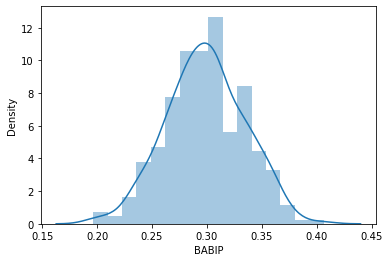

In [9]:
# Outlier를 제거하기 위해 200타수 이상으로 제한
over_200ab = bat_18[bat_18['AB']>200]
sns.distplot(over_200ab['BABIP'])

In [10]:
# BABIP 지표가 높은 선수들 (Top 10)
good_babip = over_200ab.sort_values(by='BABIP', ascending=False)
good_babip.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
104344,alfarjo01,2018,1,PHI,NL,108,344,35,90,16,2,10,37.0,3.0,0.0,18,138.0,6.0,14.0,0.0,1.0,2.0,0.406091
105552,santado01,2018,1,MIL,NL,85,211,21,56,14,1,5,20.0,1.0,1.0,20,77.0,1.0,1.0,0.0,3.0,3.0,0.386364
104327,adamewi01,2018,1,TBA,AL,85,288,43,80,7,0,10,34.0,6.0,5.0,31,95.0,3.0,1.0,1.0,2.0,6.0,0.378378
105174,martijd02,2018,1,BOS,AL,150,569,111,188,37,2,43,130.0,6.0,1.0,69,146.0,11.0,4.0,0.0,7.0,19.0,0.374677
105846,yelicch01,2018,1,MIL,NL,147,574,118,187,34,7,36,110.0,22.0,4.0,68,135.0,2.0,7.0,0.0,2.0,14.0,0.372840
105033,judgeaa01,2018,1,NYA,AL,112,413,77,115,22,0,27,67.0,6.0,3.0,76,152.0,3.0,4.0,0.0,5.0,10.0,0.368201
104452,bettsmo01,2018,1,BOS,AL,136,520,129,180,47,5,32,80.0,30.0,6.0,81,91.0,8.0,8.0,0.0,5.0,5.0,0.368159
105612,smithma05,2018,1,TBA,AL,141,480,65,142,27,10,2,40.0,40.0,12.0,47,98.0,0.0,8.0,7.0,2.0,11.0,0.366492
104708,eatonad02,2018,1,WAS,NL,95,319,55,96,18,1,5,33.0,9.0,1.0,38,64.0,0.0,11.0,2.0,0.0,2.0,0.364000
104555,caveja01,2018,1,MIN,AL,91,283,54,75,16,2,13,45.0,2.0,1.0,18,102.0,2.0,3.0,2.0,3.0,2.0,0.362573


In [11]:
# BABIP 지표가 낮은 선수들 (Bottom 10)
bad_babip = over_200ab.sort_values(by='BABIP')
bad_babip.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
105269,morrilo01,2018,1,MIN,AL,95,318,41,59,13,0,15,39.0,1.0,0.0,34,80.0,0.0,6.0,0.0,1.0,3.0,0.196429
105545,sanchga02,2018,1,NYA,AL,89,323,51,60,17,0,18,53.0,1.0,0.0,46,94.0,0.0,3.0,0.0,2.0,10.0,0.197183
104767,fowlede01,2018,1,SLN,NL,90,289,40,52,10,0,8,31.0,5.0,2.0,38,75.0,0.0,3.0,0.0,4.0,2.0,0.209524
105462,reyesjo01,2018,1,NYN,NL,110,228,30,43,12,3,4,16.0,5.0,2.0,22,39.0,1.0,0.0,1.0,0.0,5.0,0.210811
104706,dysonja01,2018,1,ARI,NL,67,206,29,39,4,2,2,12.0,16.0,3.0,27,34.0,2.0,0.0,3.0,1.0,3.0,0.216374
105106,leonsa01,2018,1,BOS,AL,89,265,30,47,12,0,5,22.0,1.0,0.0,15,75.0,0.0,4.0,3.0,1.0,6.0,0.225806
104457,birdgr01,2018,1,NYA,AL,82,272,23,54,16,1,11,38.0,0.0,0.0,30,78.0,1.0,5.0,0.0,4.0,4.0,0.229947
105232,mesorde01,2018,2,NYN,NL,66,203,23,45,8,0,10,30.0,0.0,0.0,23,42.0,3.0,2.0,0.0,1.0,7.0,0.230263
105549,santaca01,2018,1,PHI,NL,161,560,82,128,28,2,24,86.0,2.0,1.0,110,93.0,6.0,1.0,0.0,8.0,12.0,0.230599
104815,gattiev01,2018,1,HOU,AL,128,407,49,92,17,0,25,78.0,1.0,0.0,33,101.0,2.0,3.0,0.0,8.0,13.0,0.231834


## 2018년 BABIP이 높았던 타자의 기록을 살펴보자

In [12]:
# 1등
best1 = good_babip.iloc[0]
record1 = df[df['playerID']==best1['playerID']]
record1['BABIP'] = (record1['H']-record1['HR'])/(record1['AB']-record1['SO']-record1['HR']+record1['SF'])
record1

<ipython-input-12-3fe78a23fcab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record1['BABIP'] = (record1['H']-record1['HR'])/(record1['AB']-record1['SO']-record1['HR']+record1['SF'])


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
101367,alfarjo01,2016,1,PHI,NL,6,16,0,2,0,0,0,0.0,0.0,0.0,1,8.0,1.0,0.0,0.0,0.0,0.0,0.250000
102853,alfarjo01,2017,1,PHI,NL,29,107,12,34,6,0,5,14.0,0.0,0.0,3,33.0,1.0,4.0,0.0,0.0,2.0,0.420290
104344,alfarjo01,2018,1,PHI,NL,108,344,35,90,16,2,10,37.0,3.0,0.0,18,138.0,6.0,14.0,0.0,1.0,2.0,0.406091
105889,alfarjo01,2019,1,MIA,NL,130,431,44,113,14,1,18,57.0,4.0,4.0,22,154.0,1.0,10.0,0.0,2.0,12.0,0.363985
107451,alfarjo01,2020,1,MIA,NL,31,93,12,21,2,0,3,16.0,2.0,0.0,4,36.0,1.0,3.0,0.0,0.0,2.0,0.333333


In [13]:
record1_sum = record1.groupby('playerID').sum().reset_index()
record1_sum['BABIP'] = (record1_sum['H']-record1_sum['HR'])/(record1_sum['AB']-record1_sum['SO']-record1_sum['HR']+record1_sum['SF'])
record1_sum

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
0,alfarjo01,10090,5,304,991,103,260,38,3,36,124.0,9.0,4.0,48,369.0,10.0,31.0,0.0,3.0,18.0,0.380306


5년 간 991타수에서 BABIP이 0.38을 기록하였다.   


In [14]:
# 2등
best2 = good_babip.iloc[1]
record2 = df[df['playerID']==best2['playerID']]
record2['BABIP'] = (record2['H']-record2['HR'])/(record2['AB']-record2['SO']-record2['HR']+record2['SF'])
record2

<ipython-input-14-bf602bee9446>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record2['BABIP'] = (record2['H']-record2['HR'])/(record2['AB']-record2['SO']-record2['HR']+record2['SF'])


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
99599,santado01,2014,1,HOU,AL,6,17,1,0,0,0,0,0.0,0.0,0.0,1,14.0,0.0,0.0,0.0,0.0,0.0,0.000000
101085,santado01,2015,1,HOU,AL,14,39,6,10,2,0,2,8.0,2.0,1.0,2,17.0,0.0,1.0,0.0,0.0,1.0,0.400000
101086,santado01,2015,2,MIL,NL,38,121,14,28,5,0,6,18.0,2.0,0.0,18,46.0,0.0,4.0,0.0,2.0,1.0,0.309859
102564,santado01,2016,1,MIL,NL,77,246,34,63,14,0,11,32.0,2.0,3.0,32,91.0,0.0,2.0,0.0,1.0,7.0,0.358621
104038,santado01,2017,1,MIL,NL,151,525,88,146,29,0,30,85.0,15.0,4.0,73,178.0,2.0,6.0,0.0,3.0,12.0,0.362500
105552,santado01,2018,1,MIL,NL,85,211,21,56,14,1,5,20.0,1.0,1.0,20,77.0,1.0,1.0,0.0,3.0,3.0,0.386364
107110,santado01,2019,1,SEA,AL,121,451,63,114,20,1,21,69.0,8.0,3.0,50,164.0,1.0,2.0,0.0,2.0,11.0,0.347015
108516,santado01,2020,1,CLE,AL,24,70,6,11,3,0,2,12.0,0.0,0.0,13,25.0,0.0,1.0,0.0,0.0,2.0,0.209302


In [15]:
record2_sum = record2.groupby('playerID').sum().reset_index()
record2_sum['BABIP'] = (record2_sum['H']-record2_sum['HR'])/(record2_sum['AB']-record2_sum['SO']-record2_sum['HR']+record2_sum['SF'])
record2_sum

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BABIP
0,santado01,16134,9,516,1680,233,428,87,2,77,244.0,30.0,12.0,209,612.0,4.0,17.0,0.0,11.0,37.0,0.350299


8년 간 1680타수에서 BABIP이 0.35를 기록하였다.  

In [19]:
player[player['playerID']=='santado01']

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
16123,santado01,1992.0,8.0,5.0,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,NaN,NaN,NaN,Domingo,Santana,Domingo Alberto,232.0,77.0,R,R,2014-07-01,2020-08-29,santd002,santado01
